In [3]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [5]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [6]:
tr_df = train_df(r'D:\coffee\train')

In [7]:
tr_df

,Class Path,Class
0,D:\coffee\train\Dark\dark (1).png,Dark
1,D:\coffee\train\Dark\dark (10).png,Dark
2,D:\coffee\train\Dark\dark (100).png,Dark
3,D:\coffee\train\Dark\dark (101).png,Dark
4,D:\coffee\train\Dark\dark (102).png,Dark
...,...,...
1195,D:\coffee\train\Medium\medium (95).png,Medium
1196,D:\coffee\train\Medium\medium (96).png,Medium
1197,D:\coffee\train\Medium\medium (97).png,Medium
1198,D:\coffee\train\Medium\medium (98).png,Medium


In [8]:
ts_df = test_df(r'D:\coffee\test')

In [9]:
ts_df

,Class Path,Class
0,D:\coffee\test\Dark\dark (1).png,Dark
1,D:\coffee\test\Dark\dark (10).png,Dark
2,D:\coffee\test\Dark\dark (100).png,Dark
3,D:\coffee\test\Dark\dark (11).png,Dark
4,D:\coffee\test\Dark\dark (12).png,Dark
...,...,...
395,D:\coffee\test\Medium\medium (95).png,Medium
396,D:\coffee\test\Medium\medium (96).png,Medium
397,D:\coffee\test\Medium\medium (97).png,Medium
398,D:\coffee\test\Medium\medium (98).png,Medium


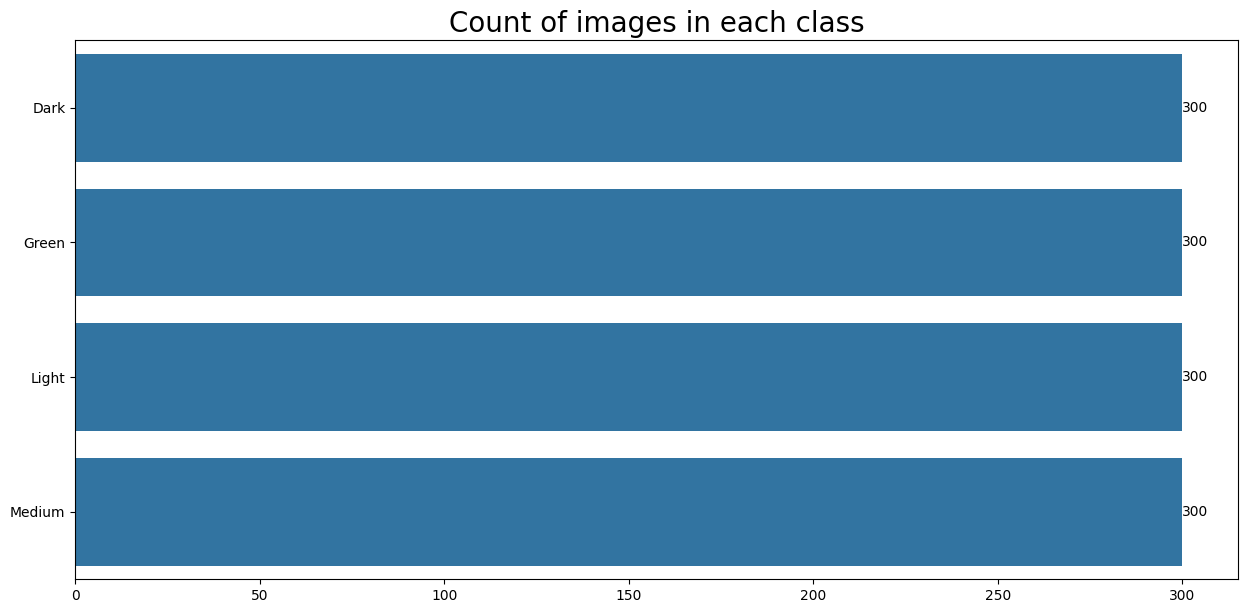

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

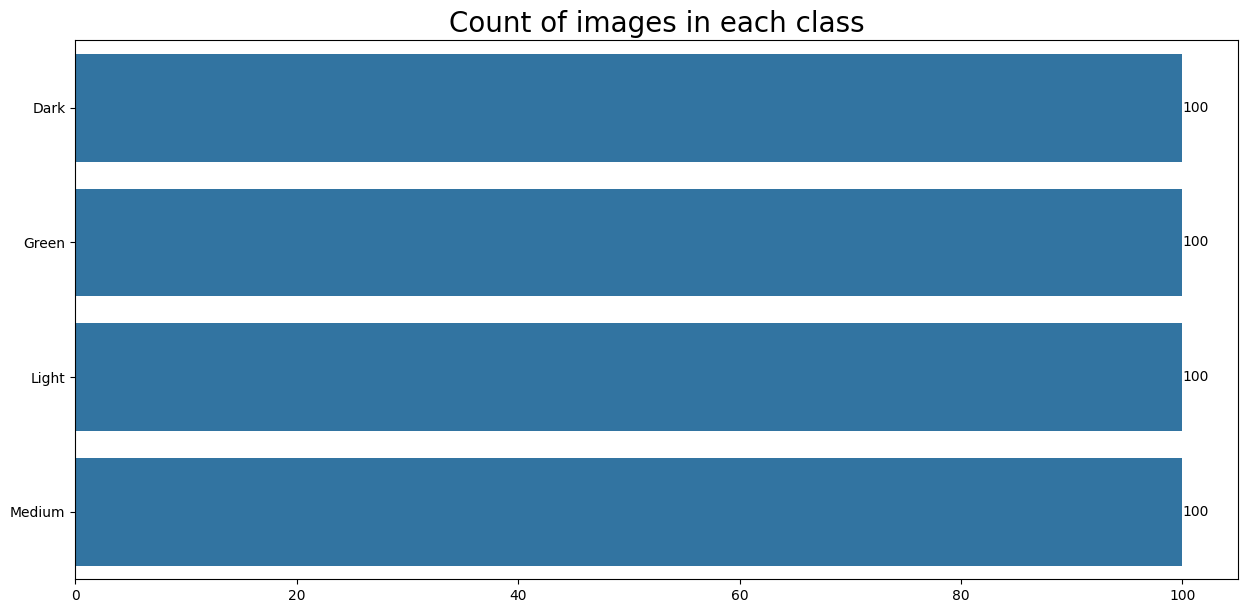

In [11]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
valid_df, ts_df = train_test_split(ts_df, train_size=.70, random_state=20)

In [13]:
valid_df

,Class Path,Class
268,D:\coffee\test\Light\light (70).png,Light
108,D:\coffee\test\Green\green (16).png,Green
21,D:\coffee\test\Dark\dark (28).png,Dark
231,D:\coffee\test\Light\light (37).png,Light
33,D:\coffee\test\Dark\dark (39).png,Dark
...,...,...
393,D:\coffee\test\Medium\medium (93).png,Medium
218,D:\coffee\test\Light\light (25).png,Light
223,D:\coffee\test\Light\light (3).png,Light
271,D:\coffee\test\Light\light (73).png,Light


In [14]:
ts_df

,Class Path,Class
10,D:\coffee\test\Dark\dark (18).png,Dark
382,D:\coffee\test\Medium\medium (83).png,Medium
374,D:\coffee\test\Medium\medium (76).png,Medium
196,D:\coffee\test\Green\green (96).png,Green
47,D:\coffee\test\Dark\dark (51).png,Dark
...,...,...
147,D:\coffee\test\Green\green (51).png,Green
375,D:\coffee\test\Medium\medium (77).png,Medium
113,D:\coffee\test\Green\green (20).png,Green
291,D:\coffee\test\Light\light (91).png,Light


In [15]:
batch_size = 16
img_size = (224,224)

tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

gen = ImageDataGenerator()


tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                 y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',batch_size=batch_size,
                                 target_size=img_size,shuffle=False)
        

Found 1200 validated image filenames belonging to 4 classes.
Found 280 validated image filenames belonging to 4 classes.
Found 120 validated image filenames belonging to 4 classes.


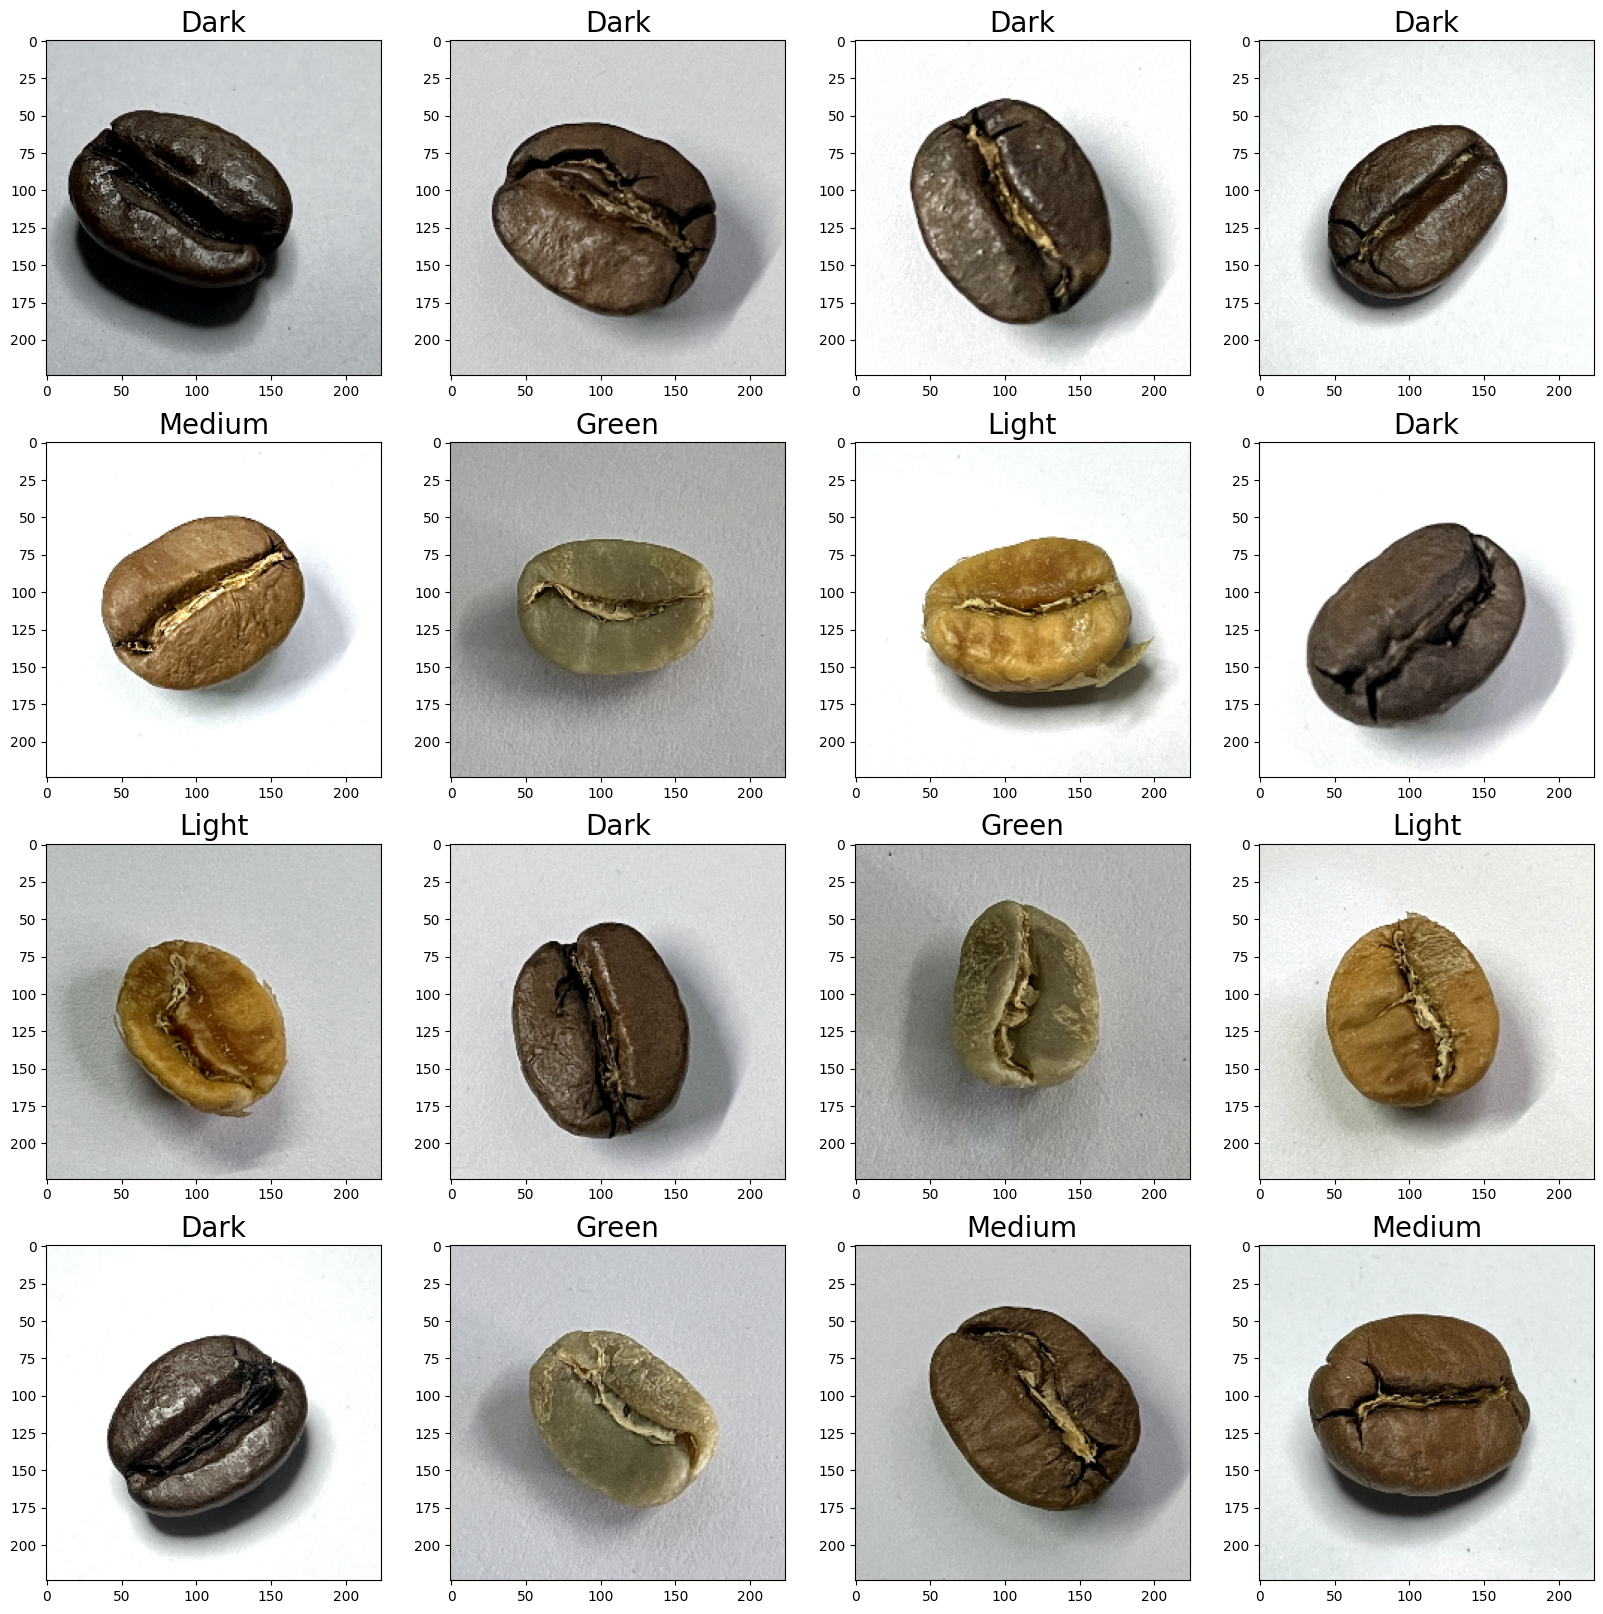

In [16]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='k', fontsize=20)
plt.show()

In [17]:
num_classes = len(classes)
num_classes

4

In [18]:
img_shape=(224,224,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(num_classes, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

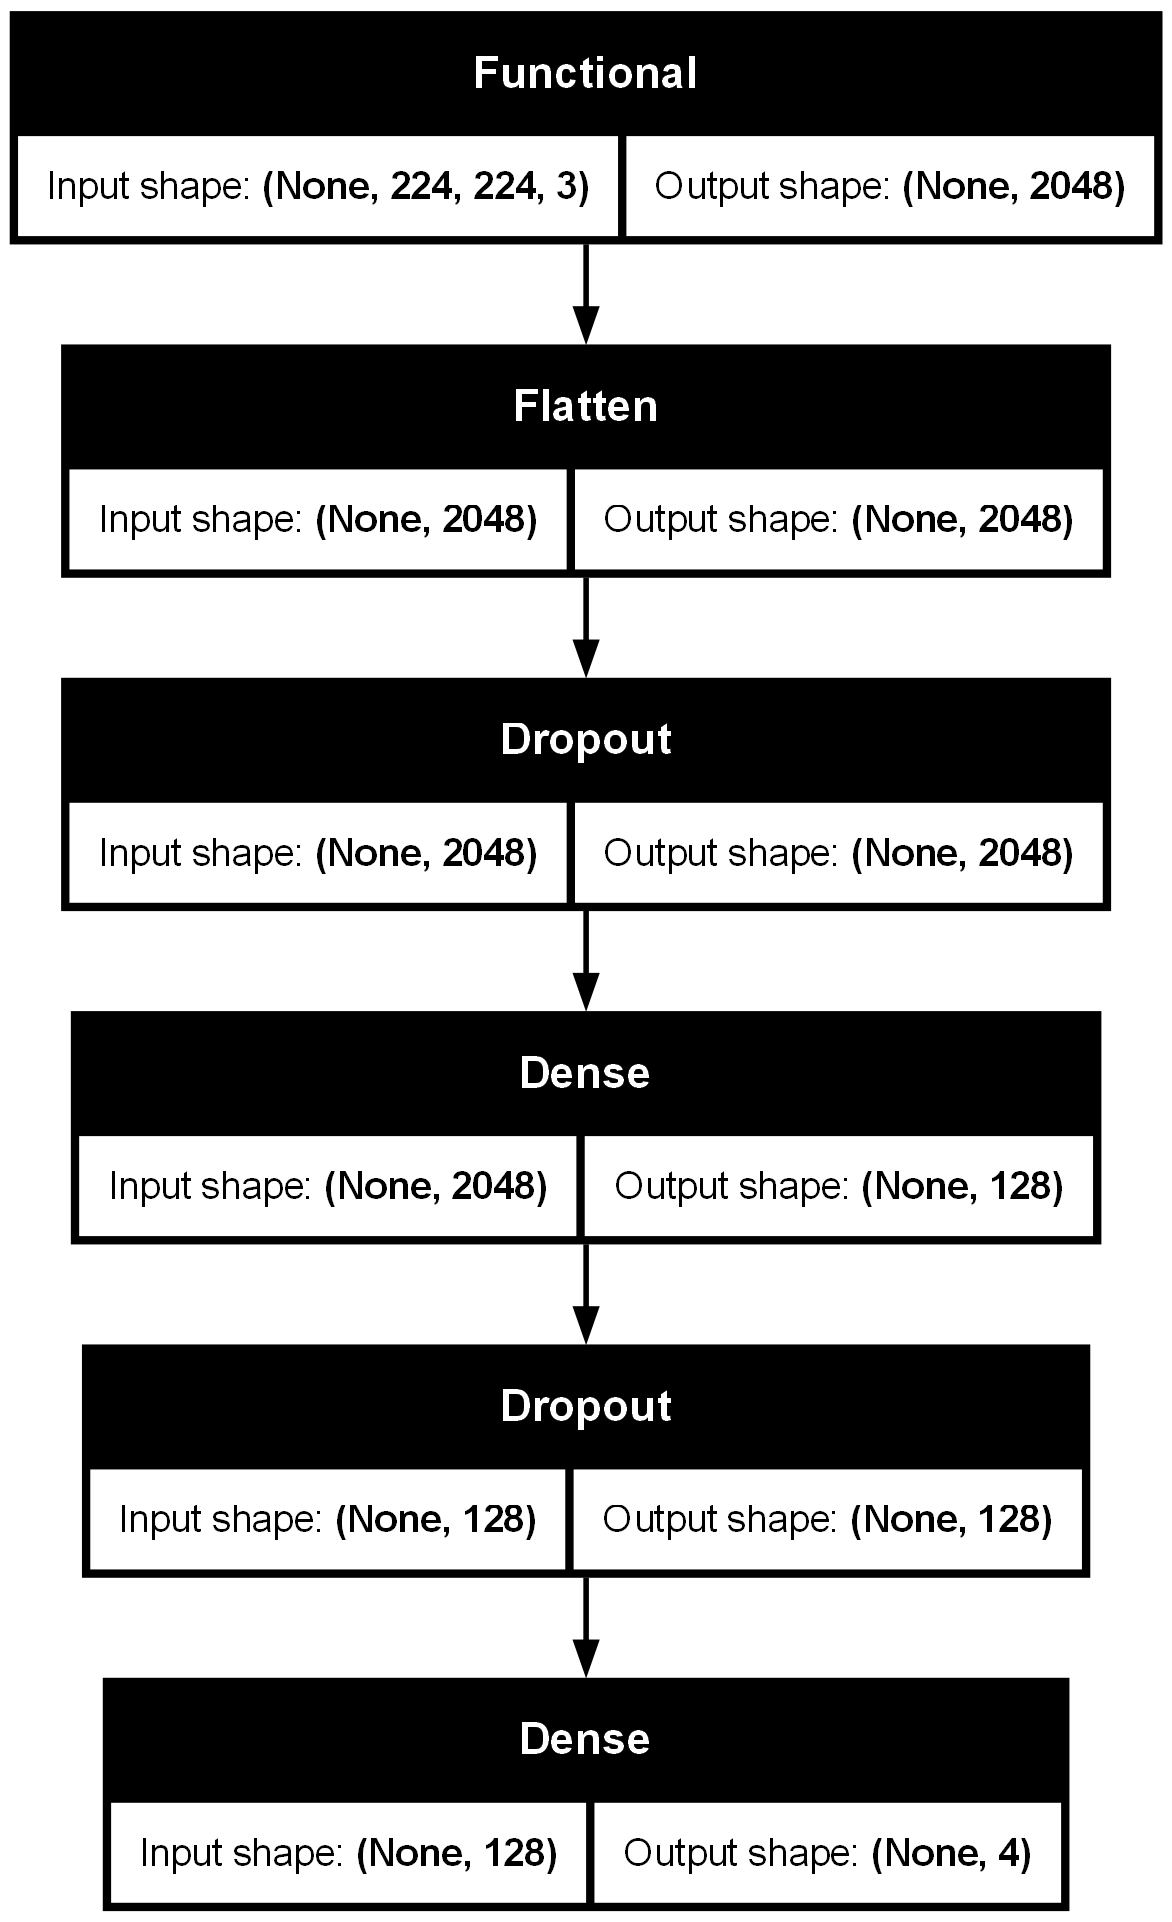

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [20]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=es)

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 549s 7s/step - accuracy: 0.6722 - loss: 0.8981 - val_accuracy: 0.9929 - val_loss: 0.0211
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 472s 6s/step - accuracy: 0.9777 - loss: 0.0747 - val_accuracy: 0.9964 - val_loss: 0.0051
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 547s 7s/step - accuracy: 0.9727 - loss: 0.0842 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 492s 6s/step - accuracy: 0.9960 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 2.5693e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 759s 10s/step - accuracy: 0.9903 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.0012


In [21]:
model.evaluate(ts_gen, verbose=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 8.5063e-04


[0.0010753895621746778, 1.0]

In [22]:
model.save("coffee_Model.h5")

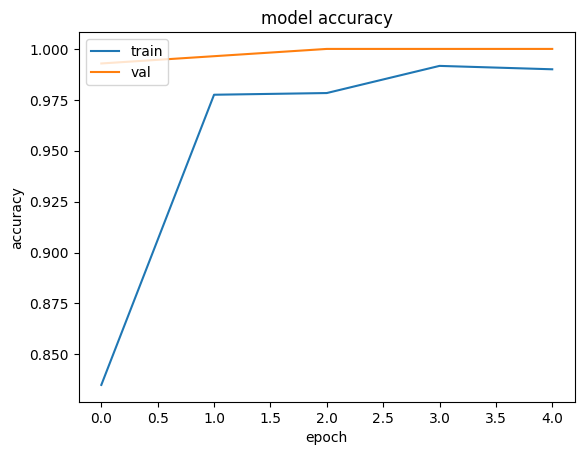

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

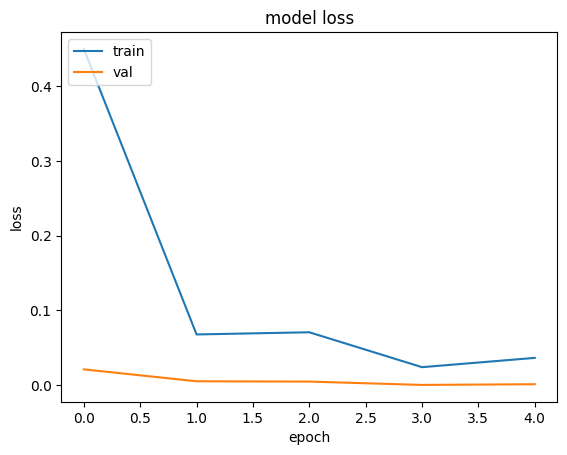

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
pred = model.predict(ts_gen)
pred = np.argmax(pred, axis=1)

labels = (tr_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = ts_df['Class']
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

        Dark       1.00      1.00      1.00        35
       Green       1.00      1.00      1.00        28
       Light       1.00      1.00      1.00        22
      Medium       1.00      1.00      1.00        35

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy of the Model: 100.0%


In [27]:
classes=list(tr_gen.class_indices.keys())
print (classes)

['Dark', 'Green', 'Light', 'Medium']


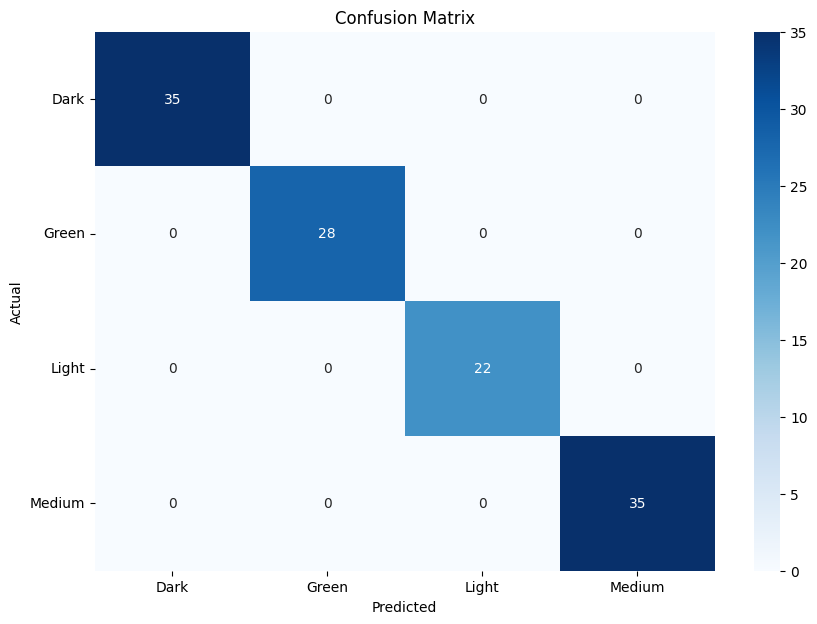

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = ts_df['Class'].values  # Replace 'Class' with the actual column name containing the true labels
cm = confusion_matrix(y_true, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

num_classes = len(classes)

plt.xticks(ticks=[i + 0.5 for i in range(num_classes)], labels=classes, rotation=0)
plt.yticks(ticks=[i + 0.5 for i in range(num_classes)], labels=classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()